# <center> 🏦 BANK CUSTOMER SUPPORT RAG SYSTEM </center>  
## <center> CS416: Large Language Models Project </center>  

### <center> 🧑‍💻 **GROUP MEMBERS** </center>  

<table align="center">
  <tr>
    <th><b>Name</b></th>
    <th><b>CMS ID</b></th>
    <th><b>Role</b></th>
  </tr>
  <tr>
    <td><code>Yuvraj Sagar</code></td>
    <td><code>373712</code></td>
    <td>Data Pipeline & Embeddings</td>
  </tr>
  <tr>
    <td><code>Areeb Ahmad</code></td>
    <td><code>393535</code></td>
    <td>Fine-Tuning & RAG</td>
  </tr>
  <tr>
    <td><code>Waleed Ahmed</code></td>
    <td><code>372675</code></td>
    <td>Fine-Tuning & Evaluation</td>
  </tr>
</table>

<p align="center">
  <b>Class/Section:</b> <code>BESE-12 B</code>   •    
  <b>Semester:</b> <code>8th - Spring 2025</code><br>
  <b>Instructor:</b> <code>Dr. Faisal Shafait</code>   •    
  <b>Submission:</b> <code>3rd May 2025</code>
</p>

---


---

#### **Project Description**  
**Task:**  
*"Implement a prototype LLM system for bank customer support using Retrieval-Augmented Generation (RAG). The system should ingest bank documents, process queries, and return context-aware responses."*  

**Current Implementation Progress:**  
✅ **Data Pipeline**  
   - Document ingestion using `PyMuPDFLoader`  
   - Text chunking via `RecursiveCharacterTextSplitter` (512 tokens, 20% overlap)  

✅ **Embedding & Indexing**  
   - Semantic embeddings with `bge-base-en-v1.5`  
   - FAISS vector store for fast retrieval  

🔄 **LLM Core**  
   - Model: **Zephyr-7b-alpha** (fine-tuned with LoRA)  
   - Hybrid retrieval: FAISS (semantic) + BM25 (keyword)  

🚧 **Pending**  
   - Guardrails implementation  
   - Streamlit/Gradio UI  

---


---

#### **Key Tools Used**  
```python
["PyMuPDF", "LangChain", "FAISS", "Sentence-Transformers", "HuggingFace Transformers", "BM25"]


---


---
## **Architectural Diagram - RAG**

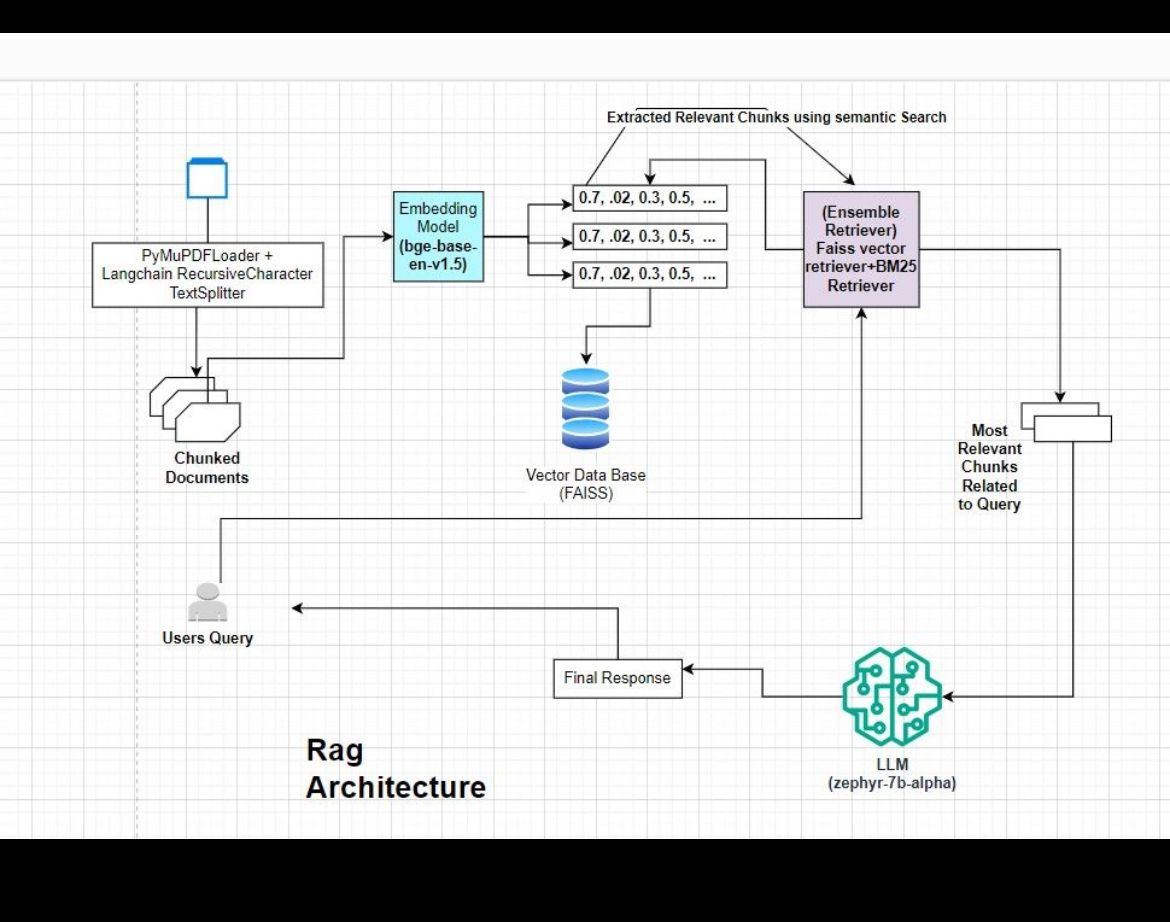


---


---
## **Overall System's Architecture Diagram**

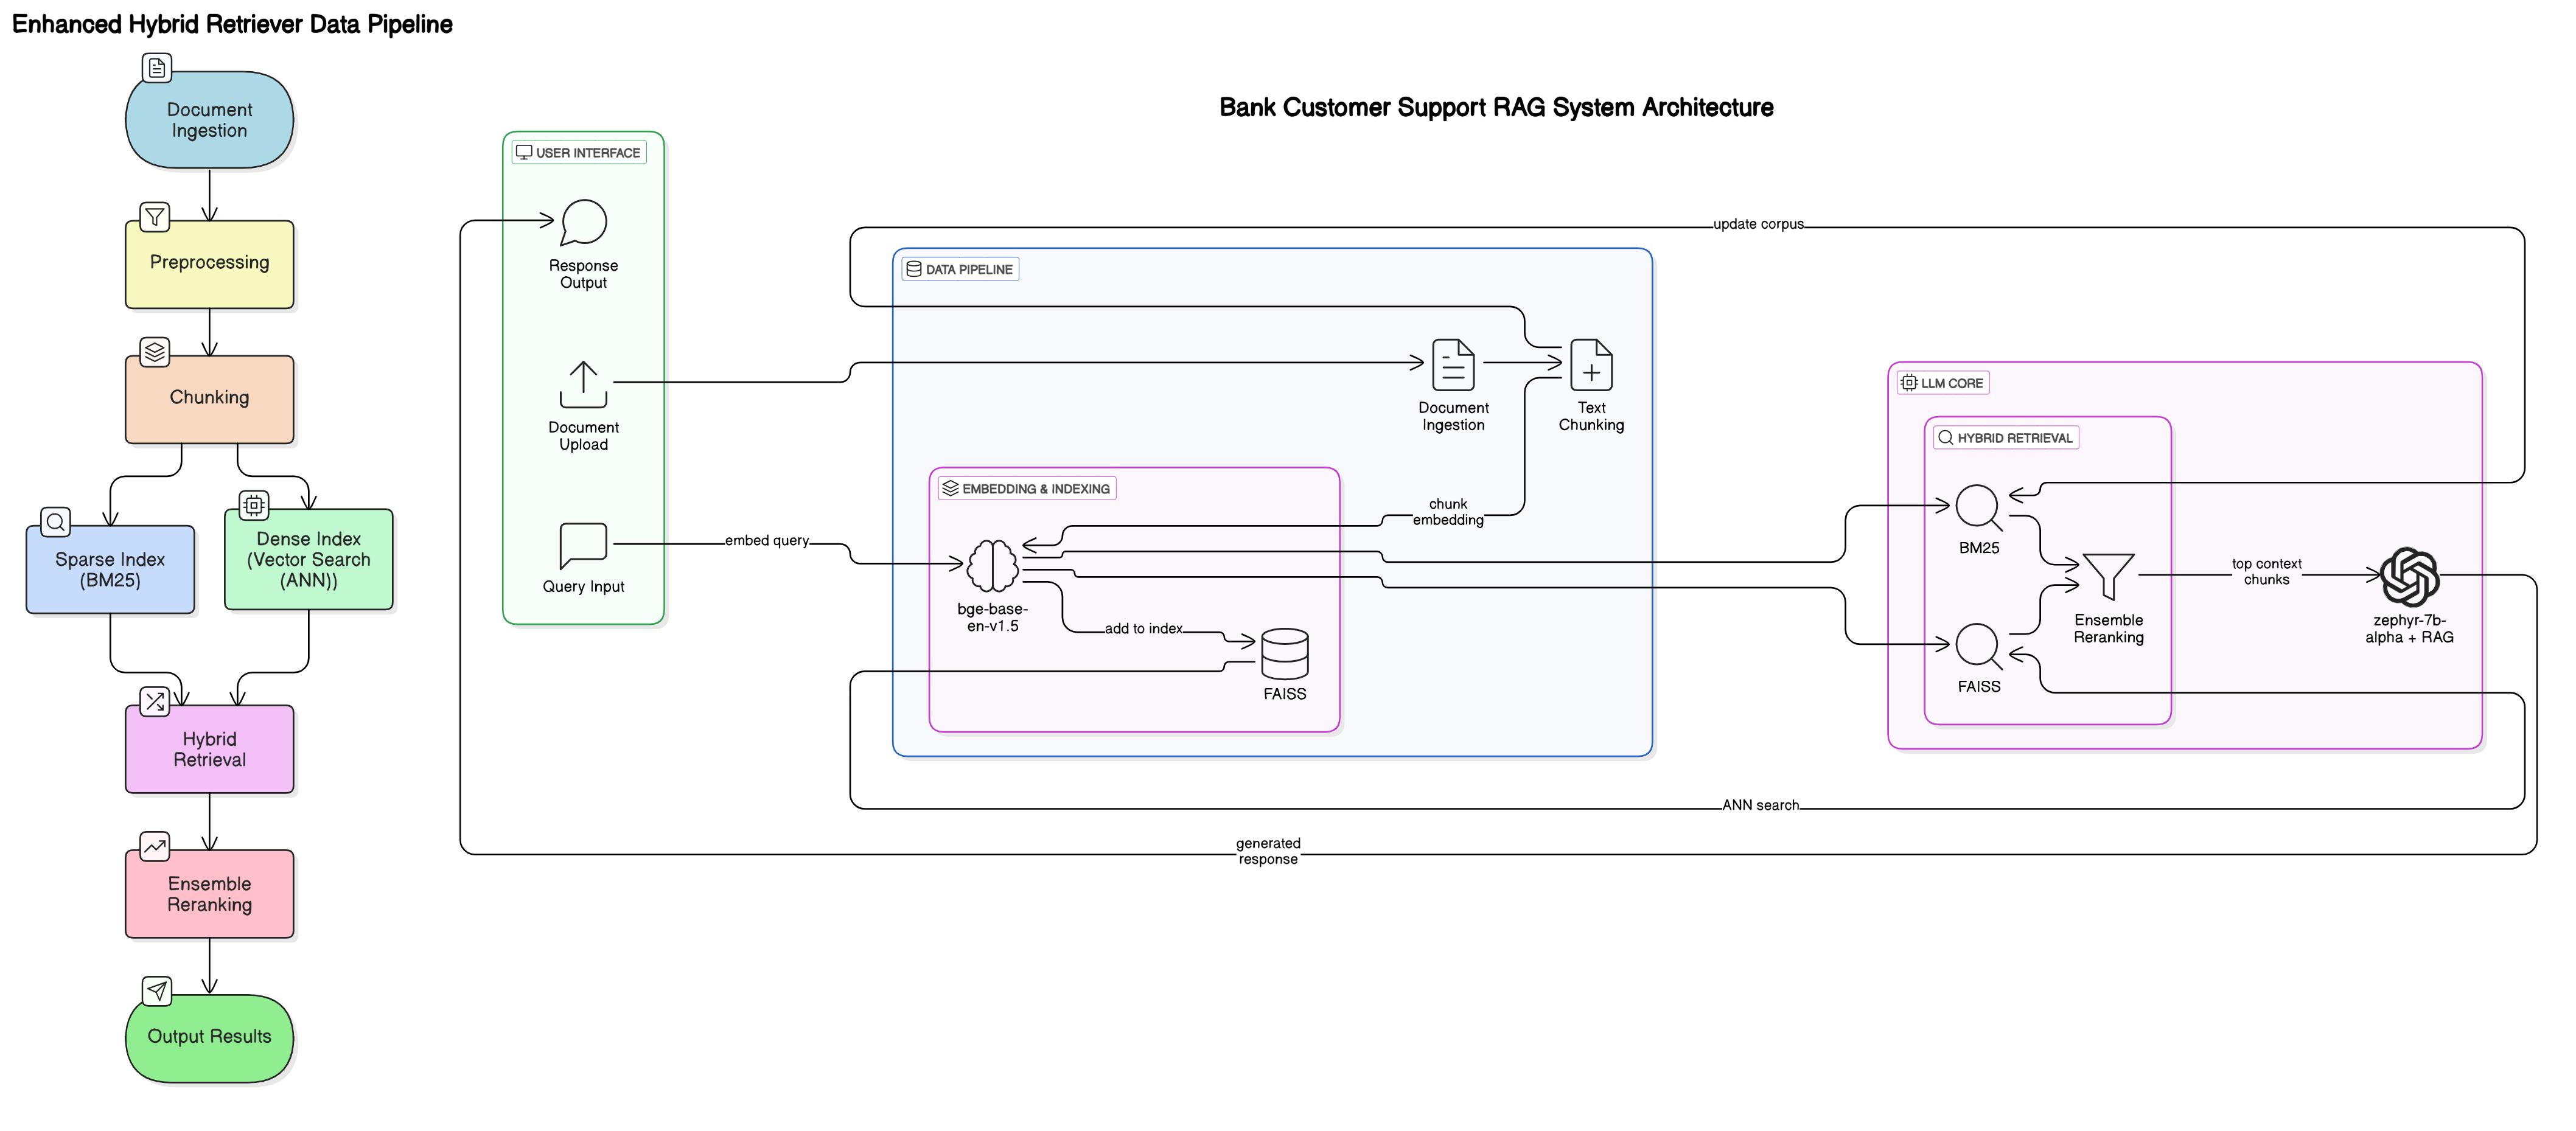


---


---

# RAG implementation for NUST bank


### Installation

In [ ]:
!pip install -q langchain sentence-transformers cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.1 MB/s eta 0:00:00


In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 47.4 MB/s eta 0:00:00


In [ ]:
!pip install rank_bm25

In [ ]:
!pip install -U langchain-community -q -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceInferenceAPIEmbeddings
from langchain.vectorstores import FAISS
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CohereRerank
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.retrievers import BM25Retriever, EnsembleRetriever

In [ ]:
import os
from getpass import getpass

HF_token = getpass()

··········


In [ ]:
os.environ['HUGGINGFACEHUB_API_TOKEN'] = HF_token

## Dataset
<!-- [BBC Tech News Dataset](http://mlg.ucd.ie/datasets/bbc.html) -->

### getting the chunked text

In [ ]:
from langchain.schema import Document

In [ ]:
# Load the JSON data
with open('all_chunks.json', 'r') as f:
    all_chunks = json.load(f)

# Extract all text content into a single list
all_text_content = []
for key, value in all_chunks.items():  # Iterate over the lists
    print(key)
    # Check if the value list is not empty before accessing elements
    if value:
        print(value[0])
        all_text_content.append(key + '\n' + value[0])
    else:
        print("Empty list for key:", key)  # Print a message for debugging

Main
Header 2: NUST BANK PRODUCTS (CONVENTIONAL)

(Click on any product below) Unnamed: 2 Unnamed: 4 Unnamed: 5  
Liability Products & Services Consumer Products
1 NUST Asaan Account (NAA) 1 NUST4Car – NUST Bank’s Auto Finance Facility (FAQs)
2 Little Champs Account  2 Personal Finance
3 NUST Sahar Accounts 3 NUST Master Card
4 NUST Waqaar Account 4 NUST Mortgage Finance
5 PakWatan Remittance Account SME Products
6 NUST Home Remittance 1 NUST Sahar Finance
7 RDA Digital Customer Onboarding  2 NUST Imarat Finance
8 Current Deposit Account (CDA) 3 NUST Ujala Finance
9 Value Plus Current Account (Individual) (VPCA) 4 NUST Flour Mill Finance
10 Value Plus Business Account (VP-BA) 5 NUST Fauri Business Finance
11 Value Premium Business Account (VPBA) 6 Prime Minister Youth Business & Agriculture Loan Scheme
12 NUST Maximiser Account 7 NUST Hunarmand Finance
13 NUST Special Deposit Account (NSDA) 8 NUST Rice Finance
14 Profit And Loss Sharing Account (PLS) Third Party Products
15 NUST Asaan 

In [ ]:
all_text_content[5]

'PWRA\nHeader 2: PakWatan Remittance Account  Unnamed: 2 Main\n\nIs there any account NUST Bank is offering for remittance purposes ?\nYes PakWatan Remittance Account.\nThrough the PakWatan Remittance Account, beneficiaries can quickly and securely receive remittances from their loved one living abroad directly into their bank account without visiting the branch.\nWhat are initial/minimum balance requirements for PakWatan Remittance Account?\nNo initial deposit requirement\nNo minimum balance requirement\nAre Local Credits allowed in PakWatan Remittance Account?\nLocal credits are also allowed in PakWatan Remittance Account\nWhat are the free services associated with PakWatan Remittance account?\nFree services include:\no First Cheque Book of 25 Leaves*\no NUST Visa Debit Card Issuance* (annual and replacement fee would apply)\no Bankers Cheque Issuance\noInter Branch Online Cash Withdrawal/ Deposit (Online)\no Internal Fund Transfer within NUST via branch (Online Transfer)\no Internet

### Embedding Model

In [ ]:
embeddings=HuggingFaceInferenceAPIEmbeddings(
    api_key=HF_token,
    model_name='BAAI/bge-base-en-v1.5'
)

In [ ]:
# Embed the text splits using the 'embeddings' object
embeddings_result = embeddings.embed_documents([t for t in all_text_content])


In [ ]:
embeddings_result[0]

[0.03532813489437103,
 -0.024777397513389587,
 -0.013912947848439217,
 0.016362415626645088,
 0.030558690428733826,
 0.057853810489177704,
 -0.03867600858211517,
 0.04641292244195938,
 0.0013955642934888601,
 -0.021902333945035934,
 -0.032147251069545746,
 -0.008778482675552368,
 -0.01746155135333538,
 0.004936448764055967,
 0.03715908154845238,
 0.022823406383395195,
 0.03787693753838539,
 0.031625427305698395,
 0.017223920673131943,
 0.01072724349796772,
 -0.04117346927523613,
 0.003204639535397291,
 0.07974637299776077,
 -0.00798607524484396,
 0.04152286797761917,
 0.009640217758715153,
 0.057286929339170456,
 0.03536917269229889,
 -0.05969691649079323,
 -0.05247774347662926,
 0.027360791340470314,
 0.041436996310949326,
 0.00962681882083416,
 -0.03507835417985916,
 0.011899200268089771,
 -0.09274385124444962,
 -0.006144334562122822,
 -0.008040579967200756,
 -0.007904288358986378,
 -0.033625274896621704,
 -0.0541628934442997,
 -0.04070882871747017,
 -0.01921362616121769,
 0.00525567

In [ ]:
from langchain.schema import Document

# Assuming 'all_text_content' is your list of strings
documents = [Document(page_content=text) for text in all_text_content]

# Now use 'documents' instead of 'all_text_content'
# Pass the 'embeddings' object (embedding function), not the 'embeddings_result' (embedding values).
vectorstore = FAISS.from_documents(documents, embeddings)

In [ ]:
vectorstore = FAISS.from_documents(all_text_content, embeddings_result)

AttributeError: 'str' object has no attribute 'page_content'

In [ ]:
  # Persist the vectorstore
  vectorstore.save_local("faiss_index")


In [ ]:
# Load the persisted vectorstore
new_vectorstore = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True
)

## **Implementing Hybrid Search with ensemble Retrieval**

> Indented block



In [ ]:
retriever_vectordb = vectorstore.as_retriever(search_kwargs={"k": 15})

In [ ]:
keyword_retriever = BM25Retriever.from_documents(documents)
keyword_retriever.k =  5

In [ ]:
ensemble_retriever = EnsembleRetriever(retrievers=[retriever_vectordb,keyword_retriever],
                                       weights=[0.5, 0.5])

In [ ]:
query="What is the Application processing time?"

In [ ]:
keyword_relevant_doc = keyword_retriever.get_relevant_documents(query)
keyword_relevant_doc

[Document(metadata={}, page_content='NMC\nHeader 2: NUST Bank Mastercard\n\n1.Who can apply for NUST Credit Card Facility?\nSalaried Individuals\nSelf Employed Businessman/Woman (SEB)\nSelf Employed Professionals (SEP)\nSpecially Abled Persons/Visually Impaired Person/Persons with Disabilities (PWD), Women.\nIndividuals having verifiable source of income can apply for NUST Mastercard Credit Card.\n2.What is the minimum age for applying NUST Mastercard Credit Card?\nMinimum 21 years old & Pakistani resident, can apply for NUST MasterCard Credit Card.\n3. What is the maximum age for applying NUST Mastercard Credit Card?\nSalaried (Permanent):  60 years\nSalaried (Contractual)/ Pensioners/SEB/SEP:  65 years\n4.Can overseas Pakistanis obtain Credit Card facility from NUST?\nYes. The individuals maintaining FC account with NUST, Remittances/ Roshan Digital Account holders/\nHolders of Naya Pakistan Certificates can apply for NUST MasterCard Credit Cards on lien basis.\nNote: Facility can on

In [ ]:
relevenat_docs = retriever_vectordb.get_relevant_documents(query)
relevenat_docs

[Document(id='d731bb7b-6a78-449d-9263-3c4c1b781091', metadata={}, page_content='NMC\nHeader 2: NUST Bank Mastercard\n\n1.Who can apply for NUST Credit Card Facility?\nSalaried Individuals\nSelf Employed Businessman/Woman (SEB)\nSelf Employed Professionals (SEP)\nSpecially Abled Persons/Visually Impaired Person/Persons with Disabilities (PWD), Women.\nIndividuals having verifiable source of income can apply for NUST Mastercard Credit Card.\n2.What is the minimum age for applying NUST Mastercard Credit Card?\nMinimum 21 years old & Pakistani resident, can apply for NUST MasterCard Credit Card.\n3. What is the maximum age for applying NUST Mastercard Credit Card?\nSalaried (Permanent):  60 years\nSalaried (Contractual)/ Pensioners/SEB/SEP:  65 years\n4.Can overseas Pakistanis obtain Credit Card facility from NUST?\nYes. The individuals maintaining FC account with NUST, Remittances/ Roshan Digital Account holders/\nHolders of Naya Pakistan Certificates can apply for NUST MasterCard Credit 

In [ ]:
docs_rel=ensemble_retriever.get_relevant_documents(query)
docs_rel

[Document(id='d731bb7b-6a78-449d-9263-3c4c1b781091', metadata={}, page_content='NMC\nHeader 2: NUST Bank Mastercard\n\n1.Who can apply for NUST Credit Card Facility?\nSalaried Individuals\nSelf Employed Businessman/Woman (SEB)\nSelf Employed Professionals (SEP)\nSpecially Abled Persons/Visually Impaired Person/Persons with Disabilities (PWD), Women.\nIndividuals having verifiable source of income can apply for NUST Mastercard Credit Card.\n2.What is the minimum age for applying NUST Mastercard Credit Card?\nMinimum 21 years old & Pakistani resident, can apply for NUST MasterCard Credit Card.\n3. What is the maximum age for applying NUST Mastercard Credit Card?\nSalaried (Permanent):  60 years\nSalaried (Contractual)/ Pensioners/SEB/SEP:  65 years\n4.Can overseas Pakistanis obtain Credit Card facility from NUST?\nYes. The individuals maintaining FC account with NUST, Remittances/ Roshan Digital Account holders/\nHolders of Naya Pakistan Certificates can apply for NUST MasterCard Credit 

In [ ]:
type(docs_rel[0])

langchain_core.documents.base.Document

## Reranking

### Implementing Re-ranking with Cohere-Rerank

In [ ]:
Cohere_API_token = getpass()

··········


In [ ]:
os.environ["COHERE_API_KEY"] =Cohere_API_token

In [ ]:
import cohere
co = cohere.Client(api_key=Cohere_API_token)

In [ ]:
compressor = CohereRerank()
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=ensemble_retriever
)
compressed_docs = compression_retriever.get_relevant_documents(query)

In [ ]:
compression_retriever

ContextualCompressionRetriever(base_compressor=CohereRerank(client=<cohere.client.Client object at 0x790db79b03d0>, top_n=3, model='rerank-english-v2.0', cohere_api_key=None, user_agent='langchain'), base_retriever=EnsembleRetriever(retrievers=[VectorStoreRetriever(tags=['FAISS', 'HuggingFaceInferenceAPIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x790dbaa2eb30>, search_kwargs={'k': 15}), BM25Retriever(vectorizer=<rank_bm25.BM25Okapi object at 0x790dbaa2e1a0>, k=5)], weights=[0.5, 0.5]))

In [ ]:
compressed_docs

[Document(page_content='Revenue Code of 1986, as amended, as qualified by Sections 502, 503, 504, and 508 of the\nInternal Revenue Code of 1986, as amended, shall be exempt from the registration fee under\nthis Article 12, only so long as those exemptions continue to exist under state or federal law.\n29SANEY CO\n2024 MA 10 PM 1:29\n(+) A person shall be exempt from paying the registration fee required by this\nARTIENT OF ELEC\nSection 855 if and to the extent that, and only so long as, federal or state law prohibits the', metadata={'relevance_score': 0.9988883}),
 Document(page_content='September 30, the registration fee shall be 75% of the annual fee; and for persons commencing\nbusiness between October 1 and December 31, the registration fee shall be 50% of the annual fee.\n(52) Notwithstanding any other provision of this Article 12, no person obtaining a\nregistration certificate for a newly established business that qualifies for the minimum\nregistration fee set forth in Section 

In [ ]:
!pip install langchain-cohere -q -U

### rerranking with zypher

In [ ]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_community.document_compressors.rankllm_rerank import RankLLMRerank

compressor = RankLLMRerank(top_n=3, model="zephyr")
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

In [ ]:
compressed_docs = compression_retriever.invoke(query)
pretty_print_docs(compressed_docs)

# LLM from Hugging face


In [ ]:
# from langchain.llms import HuggingFaceHub
# model=HuggingFaceHub(repo_id='HuggingFaceH4/zephyr-7b-beta',
#                      model_kwargs={"temperature":0.3,"max_new_tokens":512,"max_length":64}
# )

In [ ]:
!pip install -U bitsandbytes -q

In [ ]:
from langchain.llms.huggingface_pipeline import HuggingFacePipeline
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import BitsAndBytesConfig

nf4_config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
   bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "Qwen/Qwen3-4B"

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model_raw = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    device_map="auto",
    torch_dtype=torch.float16  # or use 'auto'
)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Create a pipeline for the model
pipe = pipeline(
    "text-generation",
    model=model_raw,
    tokenizer=tokenizer,
    max_new_tokens=512,
    temperature=0.7,
    do_sample=True,
    repetition_penalty=1.1
)

# Create a LangChain wrapper around the HF pipeline
llm = HuggingFacePipeline(pipeline=pipe)


Device set to use cuda:0
<ipython-input-91-e7baa6255ab5>:13: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=pipe)


## LLM Prompt

In [ ]:
template = """
<|system|>>
You are an AI Assistant that follows instructions extremely well. Based on the context below, answer the user's query.
Please be truthful and give direct answers. Please tell 'I don't know' if user query is not in CONTEXT

CONTEXT: {context}
</s>
<|user|>
{query}
</s>
<|assistant|>
"""

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
output_parser = StrOutputParser()

In [ ]:
chain = (
    {"context": ensemble_retriever, "query": RunnablePassthrough()}
    | prompt
    | llm
    | output_parser
)

In [ ]:
# chain = (
#     {"context": compression_retriever, "query": RunnablePassthrough()}
#     | prompt
#     | model
#     | output_parser
# )

In [ ]:
query="What are the Loan Limits of Ask Fauri Business Finance? "

In [ ]:
response = chain.invoke(query)

In [ ]:
print(response)

Human: 
<|system|>>
You are an AI Assistant that follows instructions extremely well. Based on the context below, answer the user's query.
Please be truthful and give direct answers. Please tell 'I don't know' if user query is not in CONTEXT

CONTEXT: [Document(id='276a17ef-e76a-460e-9172-43ce27f54594', metadata={}, page_content='NFBF\nHeader 2: NUST Fauri Business Finance\n\nIs NUST Bank offering any financing against liquid security?\nNUST Fauri Business Finance” has been introduced to provide a swift package to meet financial business needs of new to bank obligor. AFBF is offered to meet short, medium and long-term requirements of business. The finance will be provided to SMEs & Commercial for all the eligible sectors as per NUST credit policy manual.\nWhat is the Eligibility Criteria for business entity in Ask Fauri Business Finance?\nAll except individuals\nIs there any business age requirement?\nNo\nWhat is the nature of financing offered under Ask Fauri Business Finance?\nAFBF-1